In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from neuropacks import Allen

%matplotlib inline

In [2]:
allen = Allen(manifest_file=None)

In [3]:
experiment_id = 652842570

In [4]:
ophys_id = allen.get_ophys_experiment_id(
    experiment_id=experiment_id,
    stimulus_name='static_gratings'
)

In [5]:
angles = allen.get_design_matrix(
    experiment_id=experiment_id,
    stimulus_name='static_gratings',
    stimulus_key='orientation',
    design='values'
)
unique_angles = np.unique(angles)

2019-09-24 18:08:05,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/653032408


In [6]:
X = allen.get_design_matrix(
    experiment_id=experiment_id,
    stimulus_name='static_gratings',
    stimulus_key='orientation',
    design='one-hot'
)

In [7]:
Y = allen.get_response_matrix(
    experiment_id=experiment_id,
    stimulus_name='static_gratings'
)

In [8]:
cell_specimen_ids = allen.boc.get_ophys_experiment_data(ophys_id).get_cell_specimen_ids()

In [15]:
neuron = np.argwhere(cell_specimen_ids == 662282954).ravel()

In [16]:
tuning_curve = np.array(
    [np.mean(Y[angles == unique_angle, neuron]) for unique_angle in unique_angles]
)

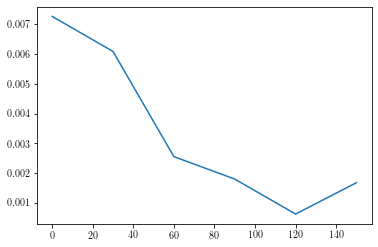

In [17]:
plt.plot(unique_angles, tuning_curve)